In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
from  modelmacrograb import GrabMacroModel
from modelclass import model
model.widescreen()

In [4]:
import modeljupytermagic  # to activate %%dataframe

In [5]:
%%dataframe smalldata start=2011
Y CPV I G X M YDISC
2011 1562682. 1320302. 373938.8 131272.0 121715.0 444232.2 59686.22
2012 1632040. 1360376. 381170.2 128860.1 146292.9 457745.7 73087.14
2013 1689572. 1396402. 414556.8 124254.9 165234.6 522447.7 111572.0
2014 1791141. 1438904. 466473.0 138532.7 194705.5 632207.9 184733.1
2015 1862357. 1476067. 536416.7 154466.9 199214.9 692794.8 188986.9
2016 1870424. 1537410. 570679.5 135990.5 164738.9 714625.6 176230.0
2017 2038337. 1549515. 702407.5 165119.3 179327.0 916469.9 358437.5
2018 2193706. 1645118. 785371.4 168506.8 193124.7 1090956. 492542.0
2019 2339741. 1737872. 874480.5 180872.4 203830.6 1154398. 497084.1
2020 2295808. 1802824. 843961.1 192010.8 171282.5 978064.9 263794.1
2021 2327410. 1846635. 866899.3 211728.7 140302.8 1009072. 270916.5
2022 2402827. 1914157. 941428.0 240255.2 152623.9 1127119. 281482.2
2023 2536741. 2007600. 1060909. 252761.7 179968.7 1260336. 295838.0
2024 2715810. 2151422. 1205927. 278364.4 199108.6 1414850. 295837.8
2025 2924763. 2300322. 1359892. 307746.9 220190.6 1559226. 295837.8
2026 3140827. 2444181. 1512696. 337450.3 242638.9 1691977. 295837.8
2027 3335992. 2552411. 1652032. 363373.5 266225.5 1793888. 295837.8
2028 3528125. 2635657. 1787782. 388431.1 290729.5 1870312. 295837.8
2029 3729062. 2714120. 1927845. 414569.4 316021.6 1939332. 295837.8
2030 3945452. 2802550. 2076752. 441658.4 342117.3 2013464. 295837.8

In [6]:
smalldata

,Y,CPV,I,G,X,M,YDISC
index,,,,,,,
2011,1562682.0,1320302.0,373938.8,131272.0,121715.0,444232.2,59686.22
2012,1632040.0,1360376.0,381170.2,128860.1,146292.9,457745.7,73087.14
2013,1689572.0,1396402.0,414556.8,124254.9,165234.6,522447.7,111572.00
2014,1791141.0,1438904.0,466473.0,138532.7,194705.5,632207.9,184733.10
2015,1862357.0,1476067.0,536416.7,154466.9,199214.9,692794.8,188986.90
2016,1870424.0,1537410.0,570679.5,135990.5,164738.9,714625.6,176230.00
2017,2038337.0,1549515.0,702407.5,165119.3,179327.0,916469.9,358437.50
2018,2193706.0,1645118.0,785371.4,168506.8,193124.7,1090956.0,492542.00
2019,2339741.0,1737872.0,874480.5,180872.4,203830.6,1154398.0,497084.10


In [7]:
fsmallmodel = '''
<fixable, damp> dlog(cpv)= -c2_cpv*(log(cpv(-1))-log(y(-1)) -        c1_cpv)+c3_cpv*dlog(y)

<fixable, damp> dlog(g)  = -c2_g*  (log(g(-1))-  log(y(-1)) -        c1_g)  +c3_g*dlog(y)

<fixable, damp> dlog(i)  =    -c2_i*  (log(i(-1))-  log(y(-1)-g(-1)) - c1_i)   +c3_i*dlog(y) 
 
<fixable, damp> dlog(m) =     -c2_m*  (log(m(-1))-   log(gde(-1))    - c1_m)   +c3_m*dlog(gde)
 
<ident> y=cpv+i+g+x-m+ydisc 
 
<ident> gde=cpv+i+g

'''

In [8]:
from modelnormalize import normal 
normal('dlog(a) = dlog(b(-7)) ')

Endo_var        : A
Original        : dlog(a) = dlog(b(-7)) 
Preprocessed    : ((LOG(A))-(LOG(A(-1))))=((LOG(B(-7)))-(LOG(B(-8))))
Normalized      : A = A(-1)*EXP(A_A+ (((LOG(B(-7)))-(LOG(B(-8))))) )
Calc_add_factor : A_A = - ((((LOG(B(-7)))-(LOG(B(-8)))))) +LOG(A)-LOG(A(-1))


In [9]:
normal('a = b',make_fixable=1,make_fitted=1,add_add_factor=1)

Endo_var        : A
Original        : a = b
Preprocessed    : A=B
Normalized      : A = (B + A_A)* (1-A_D)+ A_X*A_D 
Calc_add_factor : A_A = (A) - (B)
Fitted          : A_FITTED = B


In [10]:
thismodel = GrabMacroModel(fsmallmodel,modelname = 'Small demo model',make_fitted = True, debug = True)


Frml name:<FIXABLE, DAMP>
Endo_var        : CPV
Original        :  DLOG(CPV)= -C2_CPV*(LOG(CPV(-1))-LOG(Y(-1)) -        C1_CPV)+C3_CPV*DLOG(Y)
Preprocessed    : ((LOG(CPV))-(LOG(CPV(-1))))=-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))
Normalized      : CPV = (CPV(-1)*EXP(CPV_A+ (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )) * (1-CPV_D)+ CPV_X*CPV_D 
Calc_add_factor : CPV_A = - ((-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1)))))) +LOG(CPV)-LOG(CPV(-1))
Fitted          : CPV_FITTED = CPV(-1)*EXP( (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )

Frml name:<FIXABLE, DAMP>
Endo_var        : G
Original        :  DLOG(G)  = -C2_G*  (LOG(G(-1))-  LOG(Y(-1)) -        C1_G)  +C3_G*DLOG(Y)
Preprocessed    : ((LOG(G))-(LOG(G(-1))))=-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1))))
Normalized      : G = (G(-1)*EXP(G_A+ (-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1

In [11]:
msmallmodel = thismodel.mmodel

In [12]:
descriptions = {
    'CPV'   : 'Private Consumption',
    'Y'     : 'GDP' ,
    'G'     : 'Government' ,
    'I'     : 'Investment',
    'GDE'   : 'Gross Domestic Expenditure',
    'X'     : 'Export',
    'M'     : 'Import',
    'YDISC' :  'Discrepance',
}
msmallmodel.set_var_description(msmallmodel.enrich_var_description(descriptions))

In [13]:
print(msmallmodel.equations)

FRML <FIXABLE, DAMP> CPV = (CPV(-1)*EXP(CPV_A+ (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )) * (1-CPV_D)+ CPV_X*CPV_D $
FRML <FIXABLE, DAMP> G = (G(-1)*EXP(G_A+ (-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1))))) )) * (1-G_D)+ G_X*G_D $
FRML <FIXABLE, DAMP> I = (I(-1)*EXP(I_A+ (-C2_I*(LOG(I(-1))-LOG(Y(-1)-G(-1))-C1_I)+C3_I*((LOG(Y))-(LOG(Y(-1))))) )) * (1-I_D)+ I_X*I_D $
FRML <FIXABLE, DAMP> M = (M(-1)*EXP(M_A+ (-C2_M*(LOG(M(-1))-LOG(GDE(-1))-C1_M)+C3_M*((LOG(GDE))-(LOG(GDE(-1))))) )) * (1-M_D)+ M_X*M_D $
FRML <IDENT> Y = CPV+I+G+X-M+YDISC$
FRML <IDENT> GDE = CPV+I+G$
FRML <FIT> CPV_FITTED = CPV(-1)*EXP( (-C2_CPV*(LOG(CPV(-1))-LOG(Y(-1))-C1_CPV)+C3_CPV*((LOG(Y))-(LOG(Y(-1))))) )$
FRML <FIT> G_FITTED = G(-1)*EXP( (-C2_G*(LOG(G(-1))-LOG(Y(-1))-C1_G)+C3_G*((LOG(Y))-(LOG(Y(-1))))) )$
FRML <FIT> I_FITTED = I(-1)*EXP( (-C2_I*(LOG(I(-1))-LOG(Y(-1)-G(-1))-C1_I)+C3_I*((LOG(Y))-(LOG(Y(-1))))) )$
FRML <FIT> M_FITTED = M(-1)*EXP( (-C2_M*(LOG(M(-1))-LOG(

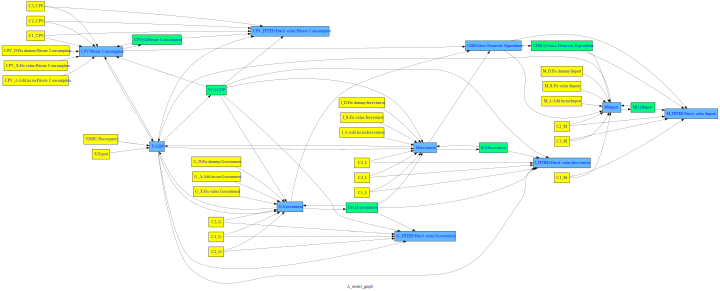

In [14]:
msmallmodel.drawmodel(size = (10,10))

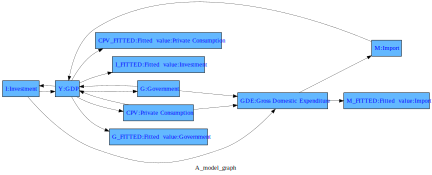

In [15]:
msmallmodel.drawendo()

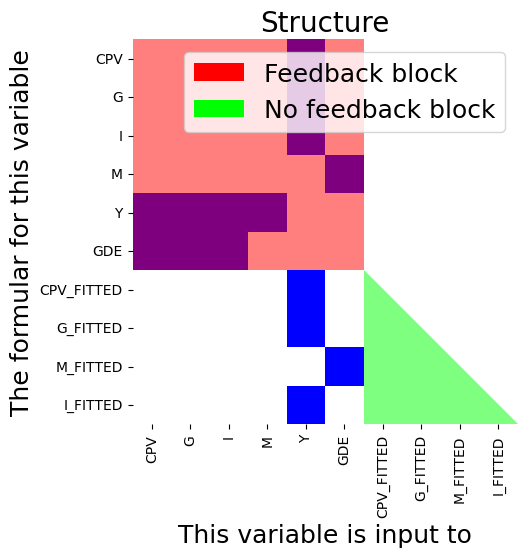

In [16]:
msmallmodel.plotadjacency();

In [17]:
msmallmodel.endogene

{'CPV',
 'CPV_FITTED',
 'G',
 'GDE',
 'G_FITTED',
 'I',
 'I_FITTED',
 'M',
 'M_FITTED',
 'Y'}

In [18]:
msmallmodel.exogene

{'C1_CPV',
 'C1_G',
 'C1_I',
 'C1_M',
 'C2_CPV',
 'C2_G',
 'C2_I',
 'C2_M',
 'C3_CPV',
 'C3_G',
 'C3_I',
 'C3_M',
 'CPV_A',
 'CPV_D',
 'CPV_X',
 'G_A',
 'G_D',
 'G_X',
 'I_A',
 'I_D',
 'I_X',
 'M_A',
 'M_D',
 'M_X',
 'X',
 'YDISC'}

In [19]:
%%dataframe parameters   periods=20 start=2011 melt t 

      c2      c1      c3 
cpv   0.38 -0.11 0.02946
g     0.3 -2.5974  1.332   
i     0.027947 -0.515348 1.6967
m     0.37  -1.57 5.0929 

In [20]:
baseline_first  = pd.concat([smalldata,parameters_melted],axis=1) # the original data plus the parameters 
baseline_first  = msmallmodel.insertModelVar(baseline_first) # to make sure all modelvariable are in the dataframe 
baseline_first.head().T # show the result, transposed

index,2011,2012,2013,2014,2015
Y,1.562682e+06,1.632040e+06,1.689572e+06,1.791141e+06,1.862357e+06
CPV,1.320302e+06,1.360376e+06,1.396402e+06,1.438904e+06,1.476067e+06
I,3.739388e+05,3.811702e+05,4.145568e+05,4.664730e+05,5.364167e+05
G,1.312720e+05,1.288601e+05,1.242549e+05,1.385327e+05,1.544669e+05
X,1.217150e+05,1.462929e+05,1.652346e+05,1.947055e+05,1.992149e+05
M,4.442322e+05,4.577457e+05,5.224477e+05,6.322079e+05,6.927948e+05
YDISC,5.968622e+04,7.308714e+04,1.115720e+05,1.847331e+05,1.889869e+05
C2_CPV,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01
C1_CPV,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01
C3_CPV,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02


In [21]:
hist_smallmodel = msmallmodel.get_histmodel()

In [22]:
print(hist_smallmodel.equations) # .equations shows the equations in this model 

FRML <IDENT> Y = CPV+I+G+X-M+YDISC$
FRML <IDENT> GDE = CPV+I+G$


In [23]:
baseline = hist_smallmodel(baseline_first,silent=1) # run the model 

In [24]:
baseline[['Y','GDE']].head()  # .head() returns the first 5 rows

,Y,GDE
index,,
2011,1562681.82,1825512.8
2012,1632040.64,1870406.3
2013,1689572.60,1935213.7
2014,1791140.40,2043909.7
2015,1862357.60,2166950.6


In [25]:
fitbaseline = msmallmodel.calc_add_factor_model(baseline,'2016','2030')
fitbaseline = thismodel.mfitmodel(fitbaseline)

Will start calculating: Calculate add factors
2016  solved
2017  solved
2018  solved
2019  solved
2020  solved
2021  solved
2022  solved
2023  solved
2024  solved
2025  solved
2026  solved
2027  solved
2028  solved
2029  solved
2030  solved
Calculate add factors calculated 
Will start calculating: Small demo model calc fittet values
2012  solved
2013  solved
2014  solved
2015  solved
2016  solved
2017  solved
2018  solved
2019  solved
2020  solved
2021  solved
2022  solved
2023  solved
2024  solved
2025  solved
2026  solved
2027  solved
2028  solved
2029  solved
2030  solved
Small demo model calc fittet values calculated 


In [26]:
fitbaseline.loc['2014':'2020',].T

index,2014,2015,2016,2017,2018,2019,2020
Y,1.791140e+06,1.862358e+06,1.870423e+06,2.038336e+06,2.193707e+06,2.339742e+06,2.295808e+06
CPV,1.438904e+06,1.476067e+06,1.537410e+06,1.549515e+06,1.645118e+06,1.737872e+06,1.802824e+06
I,4.664730e+05,5.364167e+05,5.706795e+05,7.024075e+05,7.853714e+05,8.744805e+05,8.439611e+05
G,1.385327e+05,1.544669e+05,1.359905e+05,1.651193e+05,1.685068e+05,1.808724e+05,1.920108e+05
X,1.947055e+05,1.992149e+05,1.647389e+05,1.793270e+05,1.931247e+05,2.038306e+05,1.712825e+05
M,6.322079e+05,6.927948e+05,7.146256e+05,9.164699e+05,1.090956e+06,1.154398e+06,9.780649e+05
YDISC,1.847331e+05,1.889869e+05,1.762300e+05,3.584375e+05,4.925420e+05,4.970841e+05,2.637941e+05
C2_CPV,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01,3.800000e-01
C1_CPV,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01,-1.100000e-01
C3_CPV,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02,2.946000e-02


In [27]:
result = msmallmodel(fitbaseline,'2020','2030',silent=0,solver='sim',alfa=0.5)
msmallmodel.basedf = fitbaseline # To make comparasion possible. 

Will start solving: Small demo model
Create compiled solving function for Small demo model
ljit=False stringjit=True  transpile_reset=False  hasattr(self, f"pro_{jitname}")=False
now makelos makes a sim solvefunction
2020 Solved in 6 iterations
2021 Solved in 6 iterations
2022 Solved in 6 iterations
2023 Solved in 6 iterations
2024 Solved in 6 iterations
2025 Solved in 6 iterations
2026 Solved in 6 iterations
2027 Solved in 6 iterations
2028 Solved in 6 iterations
2029 Solved in 6 iterations
2030 Solved in 6 iterations
Small demo model solved  


In [28]:
msmallmodel['#endo'] 

In [29]:
msmallmodel.modeldump('models/smallmodel.pcim')